In [127]:
import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import StandardScaler, Imputer, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Reading the train dataset created from preprocessing step

In [128]:
dataset = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\my_train.csv", header=0)

#### 2) Exploratory Data Analysis

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 38 columns):
MachineID                      674 non-null object
MachineModel                   674 non-null object
ServicePeriod                  674 non-null int64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
RecentError                    674 non-null object
MostOccuredError               674 non-null object
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
comp_4_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
RecentReplacedComp             674 non-null object
MostReplacedComp  

In [130]:
dataset.head()

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
0,MID11001,model4,21,60.00,35.65,40.71,0.0,65.00,13.58,error2,...,66.51,113.81,217.34,61.86,21.22,171.26,444.78,100.88,40.33,ComponentRepair
1,MID11002,model1,21,0.00,150.00,150.00,95.0,95.00,31.50,error5,...,73.26,108.43,208.67,62.02,21.12,170.38,445.79,101.04,40.49,ComponentRepair
2,MID11003,model3,22,37.50,90.00,93.54,0.0,85.00,27.27,error3,...,62.11,111.57,244.51,51.25,21.25,170.77,446.16,100.60,40.54,NoIssue
3,MID11004,model4,22,42.41,78.75,78.75,0.0,52.50,18.53,error2,...,63.70,111.27,238.93,61.19,22.79,170.74,445.82,100.78,40.59,NoIssue
4,MID11005,model3,22,44.21,96.44,33.24,0.0,56.25,19.02,error2,...,66.24,110.95,242.30,64.10,22.16,170.82,446.06,100.76,40.57,ComponentRepair


In [131]:
dataset.tail(5)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
669,MID11845,model2,5,18.78,60.00,60.0,82.50,0.0,23.57,error4,...,64.44,116.03,226.84,63.30,22.10,170.90,447.85,101.06,40.20,NoIssue
670,MID11846,model3,4,44.88,45.00,45.0,23.71,0.0,15.50,error1,...,66.57,109.56,159.59,64.30,17.12,170.66,447.11,100.68,40.26,ComponentRepair
671,MID11847,model2,3,72.49,26.21,40.0,55.00,0.0,15.29,error2,...,66.77,119.70,223.41,58.28,23.15,170.72,446.87,101.42,40.26,ComponentReplacement
672,MID11848,model4,4,70.00,0.00,7.6,17.19,0.0,31.69,error1,...,62.87,117.16,160.57,62.36,20.97,170.80,447.65,100.49,40.26,ComponentRepair
673,MID11850,model3,3,39.10,54.00,54.0,0.00,0.0,21.39,error1,...,61.84,114.43,224.84,61.71,20.54,170.67,444.25,100.78,40.15,ComponentRepair


In [132]:
dataset.describe()

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,...,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,13.091988,44.113991,47.677389,46.326365,19.600445,25.634139,26.116884,37.440282,44.943234,18.009629,...,155.885697,64.889674,113.157478,217.153442,62.113843,21.118279,170.758917,446.624199,100.842478,40.365356
std,5.288455,34.573864,31.041506,31.879803,30.278308,33.797062,9.207301,39.119877,36.152294,31.166810,...,7.704799,2.921304,4.886335,26.071793,3.058292,1.519342,0.229260,0.889770,0.283153,0.125382
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,144.120000,58.490000,87.780000,102.170000,50.540000,14.640000,170.140000,443.760000,100.240000,40.090000
25%,9.000000,5.225000,29.580000,23.907500,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,150.752500,62.962500,110.627500,205.285000,60.420000,20.342500,170.610000,446.010000,100.650000,40.270000
50%,13.000000,45.000000,48.825000,48.000000,0.000000,0.000000,24.230000,35.000000,48.375000,0.000000,...,153.925000,64.290000,113.830000,221.575000,62.510000,21.265000,170.760000,446.605000,100.770000,40.340000
75%,18.000000,65.732500,67.500000,67.097500,45.000000,57.000000,30.000000,69.375000,67.500000,45.000000,...,158.175000,66.025000,116.487500,235.415000,64.380000,22.147500,170.900000,447.260000,100.990000,40.460000
max,22.000000,147.380000,157.500000,157.500000,135.000000,135.000000,95.390000,142.500000,162.060000,135.000000,...,195.270000,79.110000,123.610000,269.030000,67.840000,24.290000,171.530000,449.480000,101.660000,40.680000


#### 3)Dropping unnecessary columns and checking for null values

In [133]:
dataset.drop(labels=['MachineID', 'comp_4_replace_avg'], axis=1, inplace=True)

In [134]:
dataset.isnull().sum(axis=0)

MachineModel                   0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
RecentError                    0
MostOccuredError               0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
Comp_Timelapse_diff_replace    0
RecentReplacedComp             0
MostReplacedComp               0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
RecentRepaired                 0
MostRepairedComponent          0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_min                    0
Sensor4_mi

#### 4) Filtering categorical and non categorical values

In [135]:
columns = dataset.columns
cat_attr = ['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent', 'ActionPoint']
#num_attr = ['tenure', 'MonthlyCharges', 'TotalCharges']
num_attr = list(set(columns) - set(cat_attr))

In [136]:
print("The total columns in the dataset are {}".format(len(columns)))
print("The numerical columns in the dataset are {}".format(len(num_attr)))
print("The categorical columns in the dataset are {}".format(len(cat_attr)))

The total columns in the dataset are 36
The numerical columns in the dataset are 28
The categorical columns in the dataset are 8


#### 5) Typecasting the columns into required data types

In [137]:
dataset[num_attr] = dataset[num_attr].apply(lambda x: x.astype('float64'))

In [138]:
dataset[cat_attr] = dataset[cat_attr].apply(lambda x: x.astype('category'))
#dataset['ActionPoint'] = pd.Categorical(dataset['ActionPoint'])

In [139]:
dataset.dtypes

MachineModel                   category
ServicePeriod                   float64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
RecentError                    category
MostOccuredError               category
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
Comp_Timelapse_diff_replace     float64
RecentReplacedComp             category
MostReplacedComp               category
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
RecentRepaired                 category
MostRepairedComponent          category
Sensor1_max                     float64
Sensor2_max                     float64


In [140]:
dataset.shape

(674, 36)

In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 36 columns):
MachineModel                   674 non-null category
ServicePeriod                  674 non-null float64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
RecentError                    674 non-null category
MostOccuredError               674 non-null category
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
RecentReplacedComp             674 non-null category
MostReplacedComp               674 non-null category
comp1_repair_avg               674 non-null float64
comp2_

#### 6) Class Proportionality

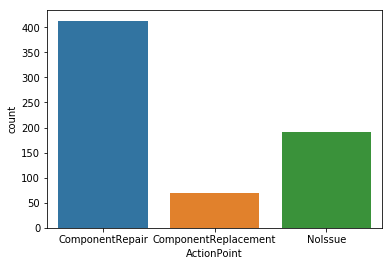

In [142]:
class_labels = dataset.ActionPoint
sns.countplot(x='ActionPoint', data=dataset)
#plt.savefig('class_prop.png')
plt.show()

#### 7) Encoding the class labels 

In [143]:
lab_enc = LabelEncoder()
lab_enc.fit(dataset['ActionPoint'])
dataset['ActionPoint'] = lab_enc.transform(dataset['ActionPoint'])

In [144]:
dataset['ActionPoint'].value_counts()

0    413
2    191
1     70
Name: ActionPoint, dtype: int64

In [145]:
labels = dataset['ActionPoint']
print(len(labels))
dataset.drop(labels='ActionPoint', axis=1, inplace=True)

674


#### 8) Dummifying the categorical variables

In [146]:
print(list(set(cat_attr)-set(['ActionPoint'])))
print(cat_attr)
##dataset_dumm = pd.get_dummies(data=dataset, columns=cat_attr)

['MostOccuredError', 'RecentError', 'RecentRepaired', 'MachineModel', 'MostReplacedComp', 'MostRepairedComponent', 'RecentReplacedComp']
['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent', 'ActionPoint']


In [147]:
dataset_dumm = pd.get_dummies(data=dataset, columns=list(set(cat_attr)-set(['ActionPoint'])))

In [148]:
dataset_dumm.columns

Index(['ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg', 'error4_avg',
       'error5_avg', 'Comp_Timelapse_diff_errors', 'comp_1_replace_avg',
       'comp_2_replace_avg', 'comp_3_replace_avg',
       'Comp_Timelapse_diff_replace', 'comp1_repair_avg', 'comp2_repair_avg',
       'comp3_repair_avg', 'comp4_repair_avg', 'Comp_Timelapse_diff_repair',
       'Sensor1_max', 'Sensor2_max', 'Sensor3_max', 'Sensor4_max',
       'Sensor1_min', 'Sensor2_min', 'Sensor3_min', 'Sensor4_min',
       'Sensor1_mean', 'Sensor2_mean', 'Sensor3_mean', 'Sensor4_mean',
       'MostOccuredError_error1', 'MostOccuredError_error2',
       'MostOccuredError_error3', 'MostOccuredError_error4',
       'MostOccuredError_error5', 'RecentError_error1', 'RecentError_error2',
       'RecentError_error3', 'RecentError_error4', 'RecentError_error5',
       'RecentRepaired_Component1', 'RecentRepaired_Component2',
       'RecentRepaired_Component3', 'RecentRepaired_Component4',
       'MachineModel_model1', 'Ma

In [149]:
dataset_dumm.head(6)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MostReplacedComp_Component3,MostReplacedComp_Component4,MostRepairedComponent_Component1,MostRepairedComponent_Component2,MostRepairedComponent_Component3,MostRepairedComponent_Component4,RecentReplacedComp_Component1,RecentReplacedComp_Component2,RecentReplacedComp_Component3,RecentReplacedComp_Component4
0,21.0,60.00,35.65,40.71,0.0,65.00,13.58,60.0,47.5,0.0,...,0,0,0,1,0,0,0,0,0,1
1,21.0,0.00,150.00,150.00,95.0,95.00,31.50,0.0,150.0,95.0,...,1,0,0,0,1,0,0,0,1,0
2,22.0,37.50,90.00,93.54,0.0,85.00,27.27,37.5,135.0,0.0,...,0,1,0,1,0,0,0,1,0,0
3,22.0,42.41,78.75,78.75,0.0,52.50,18.53,0.0,105.0,0.0,...,0,1,0,0,1,0,0,1,0,0
4,22.0,44.21,96.44,33.24,0.0,56.25,19.02,45.0,30.0,0.0,...,0,1,0,0,0,1,0,0,0,1
5,21.0,41.25,19.81,7.57,98.9,40.00,14.13,82.5,0.0,0.0,...,0,1,1,0,0,0,0,0,0,1


### Model Building

#### 9) SVM

In [150]:
X_train, X_test, y_train, y_test = train_test_split(dataset_dumm, labels, test_size=0.1, stratify=labels, random_state=0) #0.4

In [151]:
svm = SVC() #default rbf kernel

In [152]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [153]:
print("The accuracy of the svc is {:.2f}".format(svm.score(X_test,y_test)))

The accuracy of the svc is 0.62


In [154]:
print(confusion_matrix(y_test, y_pred))

[[42  0  0]
 [ 7  0  0]
 [19  0  0]]


In [155]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.62      1.00      0.76        42
          1       0.00      0.00      0.00         7
          2       0.00      0.00      0.00        19

avg / total       0.38      0.62      0.47        68



C:\Users\chait\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 10) Prepating the pipeline and hyperparameter tuning with cross validation

In [156]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [157]:
#Setting up pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)

#### 11) Setting up hyper parameters like cost of error, kernel and class weights to address class imbalance

In [158]:
#Setting params grid for hyper param tuning
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)
param_grid = {'SVM__C': [50, 60, 70, 80, 90], 'SVM__gamma': [0.008, 0.003, 0.001], 'SVM__kernel':['rbf'], 
              'SVM__class_weight':[{0:0.3, 1:2, 2:0.6}]}
svm_grid = GridSearchCV(pipeline, param_grid=param_grid, cv=kfold)

In [159]:
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SVM__C': [50, 60, 70, 80, 90], 'SVM__gamma': [0.008, 0.003, 0.001], 'SVM__kernel': ['rbf'], 'SVM__class_weight': [{0: 0.3, 1: 2, 2: 0.6}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### 12) Finding the best estimator from the grid search

In [160]:
svm_cv_best = svm_grid.best_estimator_
y_pred = svm_cv_best.predict(X_test)

In [161]:
print("Accuracy: {}".format(svm_cv_best.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Best Parameters: {}".format(svm_grid.best_params_))
print("Tuned Model Best Score: {}".format(svm_grid.best_score_))

Accuracy: 0.5735294117647058
             precision    recall  f1-score   support

          0       0.70      0.67      0.68        42
          1       0.17      0.14      0.15         7
          2       0.45      0.53      0.49        19

avg / total       0.58      0.57      0.57        68

Tuned Model Best Parameters: {'SVM__C': 80, 'SVM__class_weight': {0: 0.3, 1: 2, 2: 0.6}, 'SVM__gamma': 0.003, 'SVM__kernel': 'rbf'}
Tuned Model Best Score: 0.5907590759075908


#### 13) Confusion matrix

In [162]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.05f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

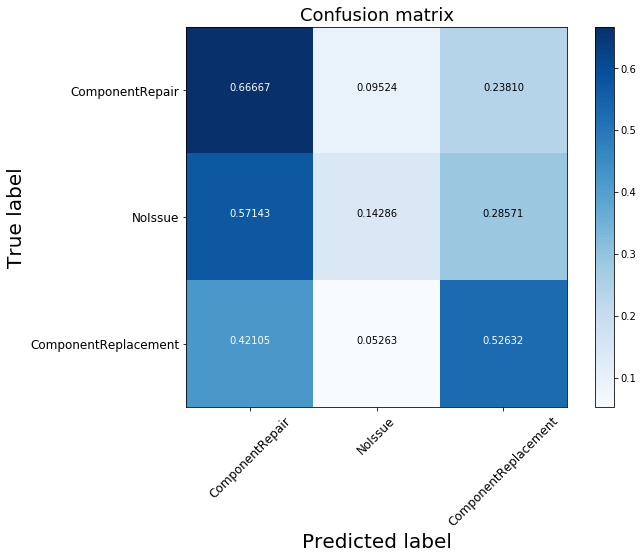

In [163]:
cnf_matrix = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_labels.unique(), title="Confusion matrix")
plt.show()

#### OneVsRestClassifier

#### Wrapping SVC with OneVsRestClassifier

In [164]:
#Setting up pipeline
from sklearn.multiclass import OneVsRestClassifier
steps_ovr = [('scaler', StandardScaler()),
         ('SVM_ovr', OneVsRestClassifier(SVC()))]
pipeline_ovr = Pipeline(steps_ovr)

In [165]:
#Setting params grid for hyper param tuning
param_grid_ovr = {'SVM_ovr__estimator__C': [30, 20, 25], 'SVM_ovr__estimator__gamma': [0.05, 0.01, 0.1], 'SVM_ovr__estimator__kernel':['rbf']}
svm_grid_ovr = GridSearchCV(pipeline_ovr, param_grid=param_grid_ovr, cv=kfold, scoring='f1_weighted')

In [166]:
svm_grid_ovr.fit(X_train, y_train)

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chait\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chait\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chait\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chait\Anaconda3\lib\site-packages\sklearn\metrics\c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM_ovr', OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SVM_ovr__estimator__C': [30, 20, 25], 'SVM_ovr__estimator__gamma': [0.05, 0.01, 0.1], 'SVM_ovr__estimator__kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [167]:
svm_cv_ovr_best = svm_grid_ovr.best_estimator_
y_pred_ovr = svm_cv_ovr_best.predict(X_test)

In [168]:
print("Accuracy: {}".format(svm_cv_ovr_best.score(X_test, y_test)))
print(classification_report(y_test, y_pred_ovr))
print("Tuned Model Best Parameters: {}".format(svm_grid_ovr.best_params_))
print("Tuned Model Best Score: {}".format(svm_grid_ovr.best_score_))

Accuracy: 0.5588235294117647
             precision    recall  f1-score   support

          0       0.67      0.69      0.68        42
          1       0.20      0.14      0.17         7
          2       0.40      0.42      0.41        19

avg / total       0.55      0.56      0.55        68

Tuned Model Best Parameters: {'SVM_ovr__estimator__C': 25, 'SVM_ovr__estimator__gamma': 0.01, 'SVM_ovr__estimator__kernel': 'rbf'}
Tuned Model Best Score: 0.5871538034215975


#### Linear SVM

In [169]:
from sklearn.svm import LinearSVC

In [170]:
#linear_svm = LinearSVC(random_state=143, C=10) #OneVsRestClassifier()
steps_linear = [('scaler', StandardScaler()),
         ('SVM_linear', LinearSVC())]
pipeline_linear = Pipeline(steps_linear)

#Setting params grid for hyper param tuning
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=143)
param_grid_linear = {'SVM__C': [20, 30]}
linear_svm = GridSearchCV(pipeline, param_grid=param_grid_linear, cv=kfold)

In [171]:
linear_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=143, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SVM__C': [20, 30]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [172]:
y_pred_linear = linear_svm.predict(X_test)

In [173]:
print("Accuracy: {}".format(linear_svm.score(X_test, y_test)))
print(classification_report(y_test, y_pred_linear))
print("Tuned Model Best Parameters: {}".format(linear_svm.best_params_))
print("Tuned Model Best Score: {}".format(linear_svm.best_score_))

Accuracy: 0.6029411764705882
             precision    recall  f1-score   support

          0       0.70      0.76      0.73        42
          1       0.25      0.14      0.18         7
          2       0.44      0.42      0.43        19

avg / total       0.58      0.60      0.59        68

Tuned Model Best Parameters: {'SVM__C': 20}
Tuned Model Best Score: 0.5891089108910891


#### SG classifier

In [174]:
steps_sgc = [('scaler', StandardScaler()),
         ('SGC', SGDClassifier(n_jobs=-1, random_state=143))]
pipeline_sgc = Pipeline(steps_sgc)

#Setting params grid for hyper param tuning
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=143)
param_grid_sgc = {'SGC__loss':['modified_huber'], 'SGC__penalty': ['elasticnet'], 'SGC__alpha': [0.2,0.3],
                     'SGC__l1_ratio': [0.1], 'SGC__max_iter': [70], 'SGC__learning_rate': ['optimal'], 
                     'SGC__eta0': [0.1], 'SGC__class_weight': [{0:0.3, 1:3, 2:0.6}]}
sgc_cv = GridSearchCV(pipeline_sgc, param_grid=param_grid_sgc, cv=kfold)

In [175]:
sgc_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=143, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SGC', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=143,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SGC__loss': ['modified_huber'], 'SGC__penalty': ['elasticnet'], 'SGC__alpha': [0.2, 0.3], 'SGC__l1_ratio': [0.1], 'SGC__max_iter': [70], 'SGC__learning_rate': ['optimal'], 'SGC__eta0': [0.1], 'SGC__class_weight': [{0: 0.3, 1: 3, 2: 0.6}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [176]:
sgc_cv_best = sgc_cv.best_estimator_
y_pred_sgc = sgc_cv_best.predict(X_test)

In [177]:
print("Accuracy: {}".format(sgc_cv_best.score(X_test, y_test)))
print(classification_report(y_test, y_pred_sgc))
print("Tuned Model Best Parameters: {}".format(sgc_cv.best_params_))
print("Tuned Model Best Score: {}".format(sgc_cv.best_score_))

Accuracy: 0.5588235294117647
             precision    recall  f1-score   support

          0       0.67      0.67      0.67        42
          1       0.20      0.29      0.24         7
          2       0.50      0.42      0.46        19

avg / total       0.57      0.56      0.56        68

Tuned Model Best Parameters: {'SGC__alpha': 0.2, 'SGC__class_weight': {0: 0.3, 1: 3, 2: 0.6}, 'SGC__eta0': 0.1, 'SGC__l1_ratio': 0.1, 'SGC__learning_rate': 'optimal', 'SGC__loss': 'modified_huber', 'SGC__max_iter': 70, 'SGC__penalty': 'elasticnet'}
Tuned Model Best Score: 0.5561056105610561


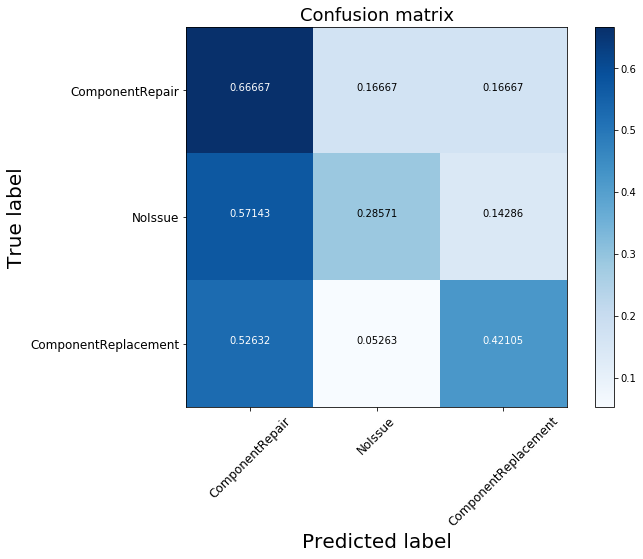

In [178]:
cnf_matrix = confusion_matrix(y_test , y_pred_sgc)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_labels.unique(), title="Confusion matrix")
plt.show()

#### One Vs One Classifier

In [179]:
from sklearn.multiclass import OneVsOneClassifier

In [180]:
linear_svm_ovo = OneVsOneClassifier(LinearSVC(random_state=143, C=20)) #OneVsRestClassifier()

In [181]:
linear_svm_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=143, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [182]:
y_pred_ovo = linear_svm_ovo.predict(X_test)

In [183]:
print("Accuracy: {}".format(linear_svm_ovo.score(X_test, y_test)))
print(classification_report(y_test, y_pred_ovo))

Accuracy: 0.6176470588235294
             precision    recall  f1-score   support

          0       0.62      0.95      0.75        42
          1       0.00      0.00      0.00         7
          2       0.67      0.11      0.18        19

avg / total       0.57      0.62      0.52        68



### Predicting on test data and writing results back to csv

In [184]:
test = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\my_test.csv", header=0)

In [185]:
test.head(6)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
0,MID11006,model3,21,45.00,20.0,20.0,0.0,50.00,19.00,error1,...,156.43,65.47,113.24,198.63,61.67,21.63,170.78,446.93,100.87,40.55
1,MID11007,model2,21,30.00,25.9,0.0,60.0,40.00,17.14,error5,...,158.08,64.81,117.10,235.26,57.40,21.46,170.26,446.78,101.52,40.64
2,MID11039,model3,22,45.00,60.0,60.0,0.0,75.00,23.08,error1,...,152.31,69.27,118.99,217.51,64.54,21.08,170.94,446.35,100.87,40.57
3,MID11045,model4,21,30.00,25.0,25.0,0.0,62.26,16.98,error5,...,163.95,64.18,115.16,218.24,55.81,20.89,171.17,447.03,100.84,40.36
4,MID11049,model4,21,0.00,0.0,0.0,38.6,67.50,33.75,error5,...,146.07,64.56,102.39,205.97,66.63,21.34,170.73,446.50,100.61,40.52
5,MID11052,model3,21,84.43,100.0,100.0,0.0,75.00,22.50,error3,...,147.56,66.28,117.62,234.11,64.21,20.84,170.56,445.97,100.63,40.40


In [186]:
test_machineID = test.MachineID.tolist()
test.drop(labels=['MachineID', 'comp_4_replace_avg'], axis=1, inplace=True)

In [187]:
test_machineID[5]

'MID11052'

In [188]:
test.isnull().sum(axis=0)

MachineModel                   0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
RecentError                    0
MostOccuredError               0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
Comp_Timelapse_diff_replace    0
RecentReplacedComp             0
MostReplacedComp               0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
RecentRepaired                 0
MostRepairedComponent          0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_min                    0
Sensor4_mi

In [189]:
test.dtypes

MachineModel                    object
ServicePeriod                    int64
error1_avg                     float64
error2_avg                     float64
error3_avg                     float64
error4_avg                     float64
error5_avg                     float64
Comp_Timelapse_diff_errors     float64
RecentError                     object
MostOccuredError                object
comp_1_replace_avg             float64
comp_2_replace_avg             float64
comp_3_replace_avg             float64
Comp_Timelapse_diff_replace    float64
RecentReplacedComp              object
MostReplacedComp                object
comp1_repair_avg               float64
comp2_repair_avg               float64
comp3_repair_avg               float64
comp4_repair_avg               float64
Comp_Timelapse_diff_repair     float64
RecentRepaired                  object
MostRepairedComponent           object
Sensor1_max                    float64
Sensor2_max                    float64
Sensor3_max              

In [190]:
test_columns = dataset.columns
test_cat_attr = ['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent']
#num_attr = ['tenure', 'MonthlyCharges', 'TotalCharges']
test_num_attr = list(set(test_columns) - set(test_cat_attr))

In [191]:
print("The total columns in the dataset are {}".format(len(test_columns)))
print("The numerical columns in the dataset are {}".format(len(test_num_attr)))
print("The categorical columns in the dataset are {}".format(len(test_cat_attr)))

The total columns in the dataset are 35
The numerical columns in the dataset are 28
The categorical columns in the dataset are 7


In [192]:
test[test_num_attr] = dataset[test_num_attr].apply(lambda x: x.astype('float64'))

In [193]:
test[test_cat_attr] = dataset[test_cat_attr].apply(lambda x: x.astype('category'))

In [194]:
test.dtypes

MachineModel                   category
ServicePeriod                   float64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
RecentError                    category
MostOccuredError               category
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
Comp_Timelapse_diff_replace     float64
RecentReplacedComp             category
MostReplacedComp               category
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
RecentRepaired                 category
MostRepairedComponent          category
Sensor1_max                     float64
Sensor2_max                     float64


In [195]:
test_dumm = pd.get_dummies(data=test, columns=test_cat_attr)

In [196]:
test_dumm.columns

Index(['ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg', 'error4_avg',
       'error5_avg', 'Comp_Timelapse_diff_errors', 'comp_1_replace_avg',
       'comp_2_replace_avg', 'comp_3_replace_avg',
       'Comp_Timelapse_diff_replace', 'comp1_repair_avg', 'comp2_repair_avg',
       'comp3_repair_avg', 'comp4_repair_avg', 'Comp_Timelapse_diff_repair',
       'Sensor1_max', 'Sensor2_max', 'Sensor3_max', 'Sensor4_max',
       'Sensor1_min', 'Sensor2_min', 'Sensor3_min', 'Sensor4_min',
       'Sensor1_mean', 'Sensor2_mean', 'Sensor3_mean', 'Sensor4_mean',
       'MachineModel_model1', 'MachineModel_model2', 'MachineModel_model3',
       'MachineModel_model4', 'RecentError_error1', 'RecentError_error2',
       'RecentError_error3', 'RecentError_error4', 'RecentError_error5',
       'MostOccuredError_error1', 'MostOccuredError_error2',
       'MostOccuredError_error3', 'MostOccuredError_error4',
       'MostOccuredError_error5', 'RecentReplacedComp_Component1',
       'RecentReplacedCo

In [197]:
test_preds = sgc_cv_best.predict(test_dumm)

In [198]:
print(test_preds.shape)
print(test_dumm.shape)

(326,)
(326, 58)


In [199]:
result_preds = lab_enc.inverse_transform(test_preds)
print(result_preds[:4])
print(np.unique(result_preds))

['ComponentReplacement' 'ComponentReplacement' 'ComponentRepair'
 'ComponentRepair']
['ComponentRepair' 'ComponentReplacement' 'NoIssue']


C:\Users\chait\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [200]:
print("Length of test machine ID {}".format(len(test_machineID)))
print("Length of test pred classes {}".format(len(result_preds)))

Length of test machine ID 326
Length of test pred classes 326


In [201]:
test_dict = {'MachineID':test_machineID, 'ActionPoint': result_preds}
test_df = pd.DataFrame(test_dict)

In [202]:
test_df.head(5)

,MachineID,ActionPoint
0,MID11006,ComponentReplacement
1,MID11007,ComponentReplacement
2,MID11039,ComponentRepair
3,MID11045,ComponentRepair
4,MID11049,ComponentRepair


In [203]:
#test_df.to_csv('../submissions/svm_cv_noovr.csv', index=False)
test_df.to_csv('../submissions/sgc_cv_optimal.csv', index=False)

#### Linear SVM - Test Predictions

In [204]:
test_linear = linear_svm.predict(test_dumm)

In [205]:
print(test_linear.shape)
print(test_dumm.shape)

(326,)
(326, 58)


In [206]:
result_preds = lab_enc.inverse_transform(test_linear)
print(result_preds[:6])
print(np.unique(result_preds))

['ComponentRepair' 'ComponentRepair' 'ComponentRepair' 'ComponentRepair'
 'ComponentRepair' 'ComponentRepair']
['ComponentRepair' 'ComponentReplacement' 'NoIssue']


C:\Users\chait\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [207]:
test_dict = {'MachineID':test_machineID, 'ActionPoint': result_preds}
test_df = pd.DataFrame(test_dict)

In [208]:
test_df.to_csv('../submissions/Linear_svm_cv.csv', index=False)